Task 1: Paired Data Analysis
Background:
    Employee attrition or often referred as turnover, is the rate at which employees leave a company and need to be replaced. High attrition rates can be costly and disruptive to an organization. They can result in increased recruitment and training expenses, loss of instutional knowledge, and decreased productivity. Job satisfaction reflects how content and fulfilled employees feel in their roles within the organization.

Problem: 
    Organizations need to analyze data related to attrition and job satisfaction to help uncover any significant associations and provide insights to the factors that influence attrition and job satisfaction within the organization. This understanding can guide HR policies and management decisions to improve employee retention and job satisfaction ultimately benefiting the organization as a whole

Data:
    The data is from Kaggle and it focuses on attrition, personal and job-related factors and financials. It has about 1470 data from different individuals. Attrition is a factor that asked the individual if they have left the organization. It is a yes or no question which is coded as 0 as 'No' and 1 for 'Yes'. While satisfation is set to 1 being 'Low', 2 'Good', 3 'High' and 4 'Very High'. There are other variables in the dataset however, we will only be looking into these two variables to see if there is a correlation.

Research Question:
    Is there a statistical significant association between employee attrition and job satisfaction?

Statistical Test:
    Chi-Squared Test for Independence can be utilized to determine whether there is a significant association between two categorical variables.
    Both variables are categorical, attrition consist of yes or no while job satisfaction represent different level of satisfaction. It provides a p-value that indicates statistically significant association.

Assumptions and Considerations:
    Assumptions that the response of the employee are not influenced by responses of other employees. If it is not independent this could lead to violation of independence assumption and may include inflate test statistics and inaccurate p-values. Potentially leading to incorrect conclusions.
    Remedies could be ensuring that the data collection process and sampling design encourage independence of observation. Random sampling and careful survey design can help reduce the risk of this assumption being violated.


Chi-Squared Test Results:
Chi-Squared Statistic: 17.505077010348
P-Value: 0.0005563004510387556
There is a statistically significant association between Attrition and Job Satisfaction.


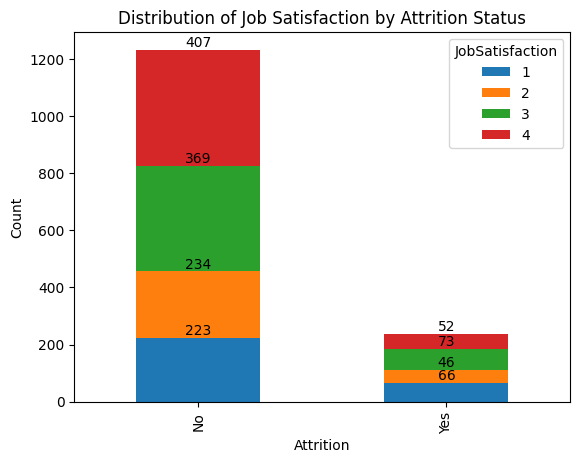

In [29]:
# Import libraries
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Import your dataset
df = pd.read_csv('HR_Analytics.csv.csv')

# Create a contingency table to summarize the data
contingency_table = pd.crosstab(df['Attrition'], df['JobSatisfaction'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output the results
print("Chi-Squared Test Results:")
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")

# Determine if the result is statistically significant
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between Attrition and Job Satisfaction.")
else:
    print("There is no statistically significant association between Attrition and Job Satisfaction.")

# Create a bar chart with counts for each level of job satisfaction
ax = contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction by Attrition Status')

# Add counts directly above the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 10), ha='center', fontsize=10)

# Display the bar chart
plt.show()


The results indicate that there is a significant association between employee attrition and satisfaction in the dataset. It measure the difference between observed and expected frequencies. The chi-squared statistic is approximately 17.51 which represents the strength of the association between both variables. The p-value of 0.00056 indicates that it smaller than the typical significance level meaning that observed association is unlikely to have occurred by random chance.
Recognizing the statistical significance of this association, the company may consider strategies to improve job satisfaction as a means of reducing attrition and retaining valueable employees.

Task 2: Multiple Mean Population Analysis
Background: 
    Maximum Heart rate is the highest number of heartbeats per minute that a person can achieve during physical activity. Chest pain is common symptom in cardiology and is often associated with angina, a condition where the heart muscle doesn't receive enough blood flow and oxygen. Comparison between max heart rate and chest pain is a valuable analysis in the field of cardiology, aiding in the understanding of cardiac symptoms and relationship with cardiac function It can assist healthcare professionals in managing and diagnosing heart-related conditions.

Problem:
    A challenge in clinical evaluation of chest pain is determining the likehood of a cardiac origin, which often requires various diagnostic tests, blood tests and exercise stress tests. Assessing the relationship between max heart rate and chest pain can be informative. It could also provide healtcare workers informed decisions in a clinical setting.

Data: 
    The data is a heart dataset from 1988 which contains 1025 data from each person. It has multiple attribute however we will be focusing more on the chest pain type and the maximum heart rate achieved. In the data, 'cp' is considered chest pain and it ranks from 0-3, in our case we started from 1-4. However the lower level shows less pain while higher level displays high pain. Maximum heart rate achieved are named 'thalach' which shows the max number of heartbeats that the person reached in the stress test.

Research Question: 
    Is there difference in maximum heart rate reached during exercise stress testing among patients with different types of chest pain?

Statistical Test:
    One-way ANOVA can have one independent variable and one dependent variable. The test can determine whether there is a statistically significant difference in maximum heart rate among the different groups of chest pain. Allows to compare means across more than two groups simultaneously.

Assumptions and Considerations:
    Data points witing each group should be independent meaning that the observations in one group should not be influenced by the other observations. Consequences can lead to biased results. Data should be approximately normally distributed, deviations can affect accuracy leading to higher or lower likelihood of detecting significant differences.
    Remedies:
        Ensure that data points within each group are collected independently. Check for normality by using statistical test or visual inspection. If data is strongly non-normal, considerations of data transformation or non-parametric alternatives might be needed.


One-Way ANOVA Results:
F-Statistic: 62.86280351279049
P-Value: 2.6707219809486804e-37
There is a statistically significant difference in maximum heart rate by chest pain type.


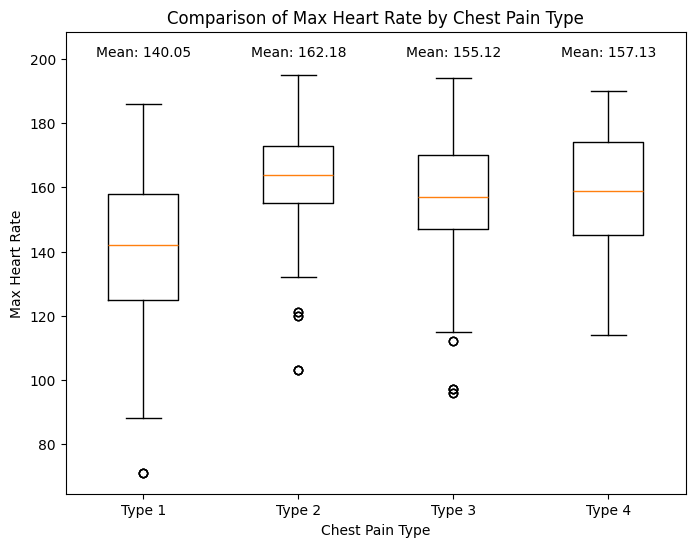

In [33]:
# Import libraries
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

# Import dataset
data = pd.read_csv('heart.csv')

# Create data frame for readability
df = pd.DataFrame({
    'ChestPainType': data['cp'],
    'MaxHeartRate': data['thalach'],
})

# Group the data by chest pain type
chest_pain_groups = [df[df['ChestPainType'] == i]['MaxHeartRate'] for i in range(0, 4)]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*chest_pain_groups)

# Output the results
print("One-Way ANOVA Results:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

# Determine if the result is statistically significant
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in maximum heart rate by chest pain type.")
else:
    print("There is no statistically significant difference in maximum heart rate by chest pain type.")

# Calculate the means of each group
means = [group.mean() for group in chest_pain_groups]

# Create a box plot to visualize 
plt.figure(figsize=(8, 6))
plt.boxplot(chest_pain_groups, labels=['Type 1', 'Type 2', 'Type 3', 'Type 4'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Max Heart Rate')
plt.title('Comparison of Max Heart Rate by Chest Pain Type')
plt.text(1, max(df['MaxHeartRate']), f'Mean: {means[0]:.2f}', fontsize=10, ha='center', va='center', backgroundcolor='w')
plt.text(2, max(df['MaxHeartRate']), f'Mean: {means[1]:.2f}', fontsize=10, ha='center', va='center', backgroundcolor='w')
plt.text(3, max(df['MaxHeartRate']), f'Mean: {means[2]:.2f}', fontsize=10, ha='center', va='center', backgroundcolor='w')
plt.text(4, max(df['MaxHeartRate']), f'Mean: {means[3]:.2f}', fontsize=10, ha='center', va='center', backgroundcolor='w')
plt.show()


The result of the ANOVA test on the comparison for Max Heart rate reached and Types of Chest Pain from 1-4 is that there is a strong statistical significant difference. The type of chest pain is associated with variations in maximum heart rate. F-statistic is at 62.86 which indicates there is a larger difference between group means. The p-value was at 2.67e-37 which is a very small value and is below significance level meaning type of chest pain has a significant impact on the maximum heart rate.
In practical terms, there are likely significant difference in max heart rate among patients with differenct chest pain types. The specific nature of these difference would depend on the data, but it is clear that chest pain type is a factor that influence maximum heart rate.

Task 3: Variance Comparison Analysis
Background:
    Cholestorol levels are crucial biomarkers in cardiovascular health assessment. Cholestorol is a type of lipid found in the blood, and abnormal levels can increase the risk of heart disease. Chest pain is a common sympton of various heart conditions and can be indicative of different underlying issues.

Problem: 
    The proble is to investigate whether there is significant difference in cholestorol level variances among individuals with different types of chest pain. Chest pain can manifest in various ways and may be associated with different heart conditions. It is possible that individuals with different types of chest pain exhibit varying levels of cholestorol variability. Understanding the relationship between chest pain and cholesterol can aid in risk assessment, diagnosis and treatment planning.

Data: 
    The data is the same as from Task 2 however this time we are focusing on chest pain in regards to cholestorol variance. Chest pain is the same as before, in the dataset it is set to 0-3 while in our code we have set it to Type 1 to Type 4. The lower the type the less the pain and the higher the type the higher the pain. In the dataset, the name of the cholesterol column is 'chol' and is measured by the blood serum in milligrams per deciliter.

Research Question:
    Is there a statistical significant difference in the variances of cholestorol levels among patients with different types of chest pain?

Statistical Test:
    By conducting a variances comparison analysis using the Levene's test and visualizing through a box plot, we aim to provide insight into the relationship between the two varibales. The test can handle situations where there are more than two groups. It has robustness to non-normality and focus on the homogeneity of variances.

Assumptions and Considerations:
    The Levene's Test could assume that the variances within each group are approximately equal. In other words, it assumes that the group have similar dispersion or spread. This violation could yield inaccurate results. Violating the assumption could lead to Type I and Type II errors.
        Remedies:
            If assumption of homoscedasticity is violated, data transformation techniques can be applied to stabilize variances. Another consideration is non-parametric alternatives such as Brown-Forsythe.

Levene Result:
Levene's Test Statistic: 5.07
P-Value: 0.001732
There is a statistically significant difference in cholesterol level variances by chest pain type.


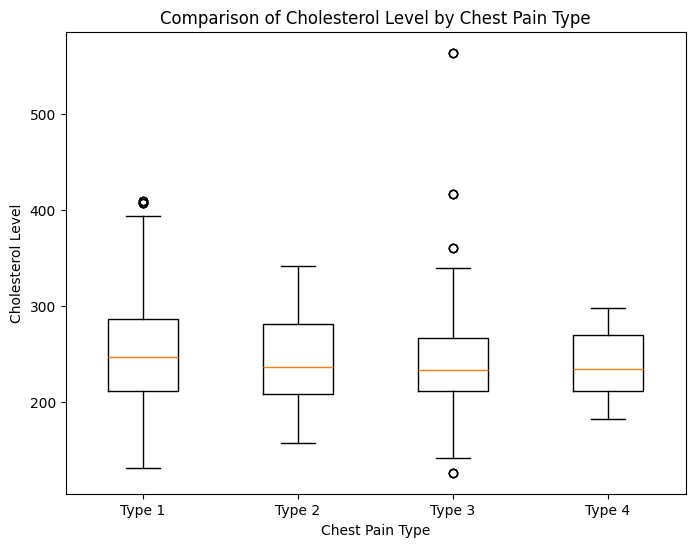

In [39]:
# Import Libraries
import pandas as pd
from scipy.stats import levene
import matplotlib.pyplot as plt

# Import dataset
data = pd.read_csv('heart.csv')

# Create Dataframe for readability
df = pd.DataFrame({
    'ChestPainType': data['cp'],
    'CholesterolLevel':  data['chol']
})

# Group the data by chest pain type
chest_pain_groups = [df[df['ChestPainType'] == i]['CholesterolLevel'] for i in range(0, 4)]

# Perform Levene's test
statistic, p_value = levene(*chest_pain_groups)

# Print out the results
print(f"Levene Result:")
print(f"Levene's Test Statistic: {statistic:.2f}")
print(f"P-Value: {p_value:.6f}")

# Interpret the results
alpha = 0.05  # Significance level 
if p_value < alpha:
    print("There is a statistically significant difference in cholesterol level variances by chest pain type.")
else:
    print("There is no statistically significant difference in cholesterol level variances by chest pain type.")

# Create a box plot to visualize the distribution of cholesterol levels by chest pain type
plt.figure(figsize=(8, 6))
plt.boxplot(chest_pain_groups, labels=['Type 1', 'Type 2', 'Type 3', 'Type 4'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol Level')
plt.title('Comparison of Cholesterol Level by Chest Pain Type')
plt.show()


The result shows that there is a statistically significant difference in cholestorol level variances by chest pain type. The Levene's Test Statistic shows a 5.07 which mesures the difference in variance among the groups. This means that it is unlikely to occur by random chance and that chest pain is associated with significantly different cholesterol level. The p-value of 0.001732 shows less than the significance level 0.05.
This information is valuable in understanding the relationship between the two variables and may have implication for risk assessment, diagnosis or treatment in the context of cardiovascular health.